<h1>Relational Classification</h1>
<h2>using random node sampling and partial crawls</h2>

In [2]:
__author__ = "Lisette Espin-Noboa"
__reference__ = """
[1] Inference in OSNs via Lightweight Partial Crawls. Konstantin Avrachenkov, Bruno Ribeiro and Jithin K. Sreedharan
    https://github.com/jithin-k-sreedharan/HypRW
    https://hal.inria.fr/hal-01403018/document
    
[2] Stochastic Gradient Descent for Relational Logistic Regression via Partial Network Crawls
    https://arxiv.org/pdf/1707.07716.pdf

[3] Should We Be Confident in Peer Effects Estimated From Social Network Crawls?    
    https://www.aaai.org/ocs/index.php/ICWSM/ICWSM17/paper/viewFile/15696/14882
    
[4] Classification in networked data: A toolkit and a univariate case study. 
    Macskassy, S. A., & Provost, F. (2007). 
    Journal of machine learning research, 8(May), 935-983.    
    http://www.jmlr.org/papers/volume8/macskassy07a/macskassy07a.pdf
                """
__license__ = "GPL"
__version__ = "1.0.3"
__maintainer__ = "Lisette Espin-Noboa"
__email__ = "Lisette.Espin@gesis.org"
__status__ = "Developing"

<h2>Dependencies</h2>


In [3]:
###############################################################################################
# Warnings
###############################################################################################
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="SparseEfficiencyWarning")
warnings.filterwarnings("ignore", message="Changing the sparsity structure of a csr_matrix is expensive.")

In [ ]:
#################################################
# In case Binder does not have dependencies
#################################################
# import sys
# !{sys.executable} -m pip install pandas seaborn numpy

In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
from utils import plot_rocauc_bias
from utils import plot_results
from utils import plot_compact

<h2>Constants</h2>


In [5]:
SAMPLINGS =  ['random_nodes','partial_crawls','partial_crawls_min']
FN = "summary_{}.csv"

<h2>Plots</h2>

In [6]:
sns.set_context('notebook')

<h3>1. Random Nodes</h3>

In [7]:
df_random_nodes = pd.read_csv(FN.format('random_nodes'), index_col=0).query("m in [4,20,40] & N == 2000")
df_random_nodes.head()

,runid,N,E,m,B,H,rocauc,ccm,ccM,bias1,...,h01,h10,B0,B1,H00,H11,H01,H10,h,precise_pseeds
200,1,2000,7984,4,0.1,0.5,0.574720,0.254335,0.776275,0.246781,...,0.13,0.08,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.1
201,2,2000,7984,4,0.1,0.5,0.498341,0.061798,0.961776,0.060375,...,0.11,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.1
202,3,2000,7984,4,0.1,0.5,0.507409,0.067416,0.948212,0.066378,...,0.05,0.17,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.1
203,4,2000,7984,4,0.1,0.5,0.516278,0.070270,0.930650,0.070206,...,0.07,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.1
204,5,2000,7984,4,0.1,0.5,0.502658,0.118644,0.878620,0.118970,...,0.11,0.09,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.1


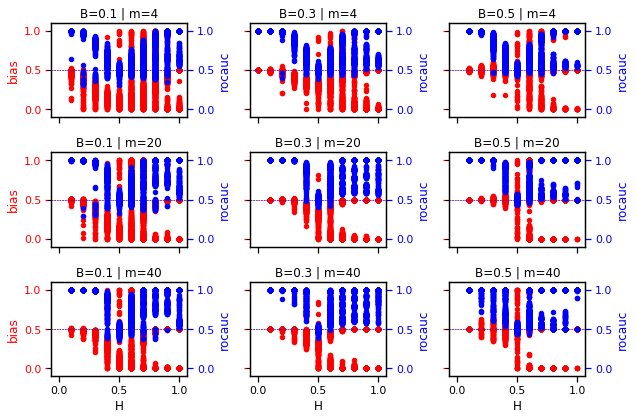

In [8]:
plot_rocauc_bias(df_random_nodes)

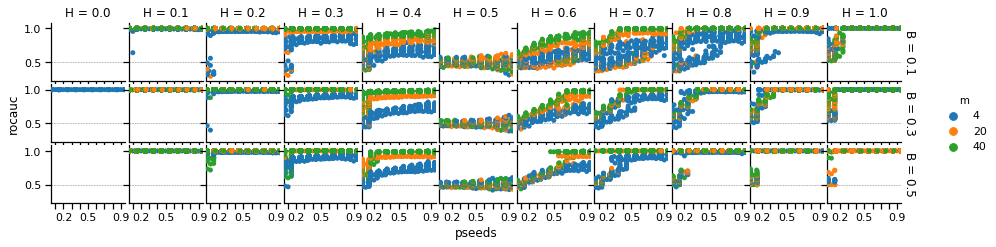

In [9]:
plot_results(df_random_nodes,'rocauc')

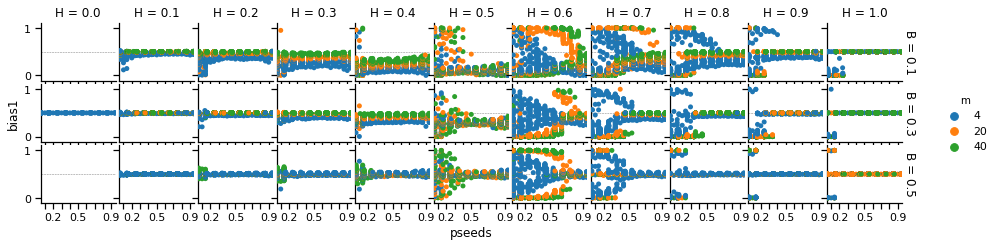

In [10]:
plot_results(df_random_nodes,'bias1')

<h3>2. Partial Crawls</h3>

In [11]:
df_partial_crawls = pd.read_csv(FN.format('partial_crawls'), index_col=0)
df_partial_crawls.head()

,runid,N,E,m,B,H,rocauc,ccm,ccM,bias1,...,h01,h10,B0,B1,H00,H11,H01,H10,h,precise_pseeds
0,1,2000,7984,4,0.1,0.8,0.756795,0.183206,0.928829,0.164749,...,0.01,0.07,0.9,0.1,0.02,0.88,0.02,0.08,0.90,0.38
1,1,2000,78400,40,0.3,0.2,1.000000,1.000000,1.000000,0.500000,...,0.27,0.49,0.7,0.3,0.21,0.04,0.26,0.49,0.25,0.33
2,1,2000,39600,20,0.3,0.8,1.000000,0.992424,0.996587,0.498954,...,0.04,0.14,0.7,0.3,0.17,0.64,0.06,0.13,0.81,0.36
3,1,2000,39465,20,0.3,1.0,1.000000,1.000000,1.000000,0.500000,...,0.00,0.00,0.7,0.3,0.30,0.70,0.00,0.00,1.00,0.41
4,1,2000,39409,20,0.1,1.0,1.000000,1.000000,1.000000,0.500000,...,0.00,0.00,0.9,0.1,0.10,0.90,0.00,0.00,1.00,0.37


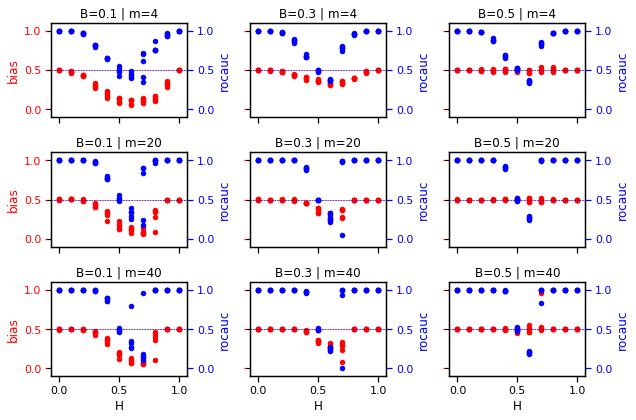

In [12]:
plot_rocauc_bias(df_partial_crawls)

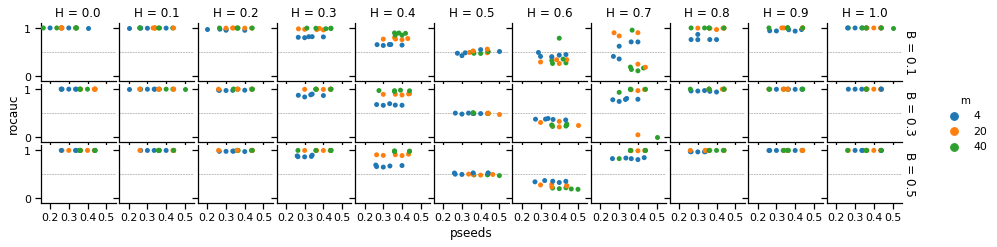

In [13]:
plot_results(df_partial_crawls,'rocauc')

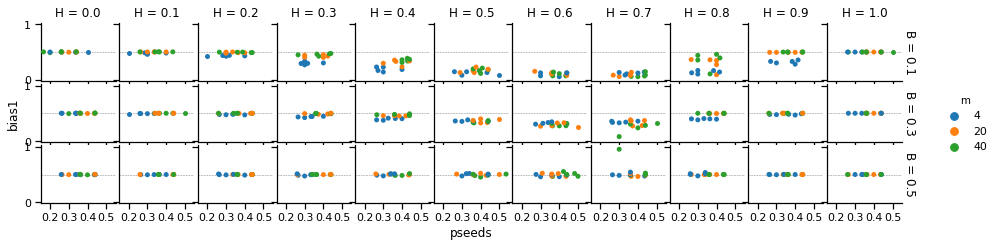

In [14]:
plot_results(df_partial_crawls,'bias1')

<h3>3. Partial Crawls (starting from minorities)</h3>

In [15]:
df_partial_crawls_min = pd.read_csv(FN.format('partial_crawls_min'), index_col=0)
df_partial_crawls_min.head()

,runid,N,E,m,B,H,rocauc,ccm,ccM,bias1,...,h01,h10,B0,B1,H00,H11,H01,H10,h,precise_pseeds
0,1,2000,39454,20,0.1,1.0,1.000000,1.000000,1.000000,0.500000,...,0.00,0.00,0.9,0.1,0.10,0.90,0.00,0.00,1.00,0.39
1,1,2000,78400,40,0.1,0.1,0.999781,1.000000,0.993437,0.501646,...,0.10,0.71,0.9,0.1,0.27,0.01,0.09,0.63,0.28,0.35
2,1,2000,39481,20,0.5,1.0,0.500000,1.000000,0.000000,1.000000,...,0.00,0.00,0.5,0.5,0.50,0.50,0.00,0.00,1.00,0.34
3,1,2000,78400,40,0.1,0.1,0.999955,1.000000,0.994557,0.501365,...,0.19,0.67,0.9,0.1,0.24,0.01,0.09,0.66,0.25,0.32
4,1,2000,78400,40,0.3,0.2,1.000000,0.996988,1.000000,0.499246,...,0.25,0.52,0.7,0.3,0.21,0.04,0.26,0.49,0.25,0.35


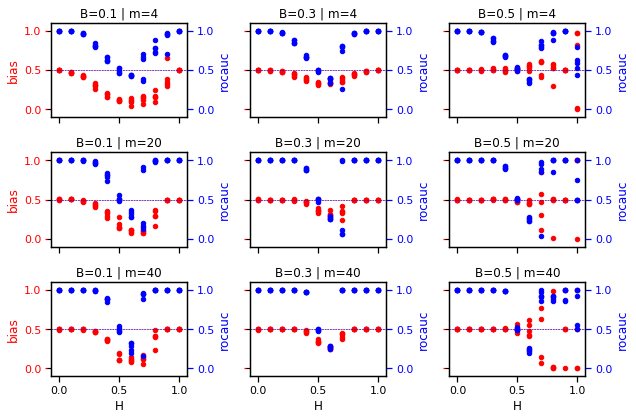

In [16]:
plot_rocauc_bias(df_partial_crawls_min)

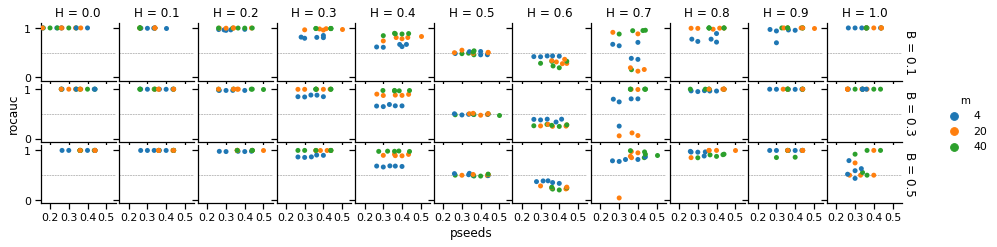

In [17]:
plot_results(df_partial_crawls_min,'rocauc')

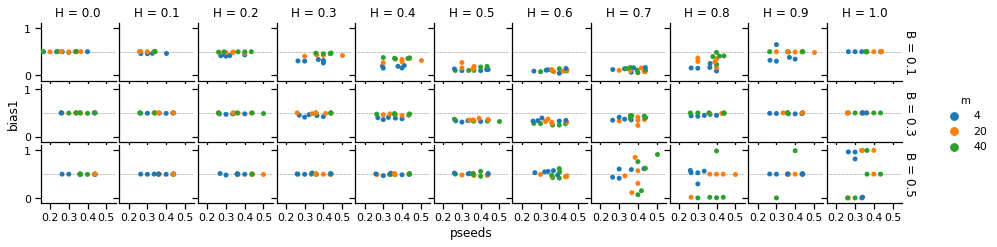

In [18]:
plot_results(df_partial_crawls_min,'bias1')